# REPORTE 7

## LECTURA

Chetty, Hendren y Katz en The Effects of Exposure to Better Neighborhoods on Children: New Evidence from the Moving to Opportunity Experiment desarrollan su pregunta se investigación acerca de cual es el impacto de puede producir mudarse a vecindarios menos pobres respecto en los ingresos futuros durante la infancia. En este sentido, los autores se centran en aquellas personas que se mudaron a zonas menos pobres, específicamente durante la niñez. De la misma forma, establecen una relación directamente asociada con la edad de estas personas, de manera que el aumento de sus ingresos futuros era aun más significativo mientras más jóvenes eran.

Por un lado, una de las fortalezas de este artículo es el uso del MTO, pues estudios anteriores a este no encontraron evidencia significativa sobre el impacto que produciría vivir en vecindarios menos pobres, respecto a los ingresos y empleos futuros. En este artículo, los autores revisan el experimento MTO y se enfocan en sus impactos a largo plazo en los niños que eran jóvenes cuando sus familias se mudaron a mejores barrios. Moving to Opportunity (MTO), un experimento del Departamento de Vivienda y Desarrollo Urbano de EE. UU. ofreció a una muestra seleccionada al azar de familias que viven en proyectos de vivienda de alta pobreza, vales de vivienda subsidiada para mudarse a barrios de menor pobreza en los 90. El MTO generó grandes diferencias en entornos de vecindario para familias comparables. De esta forma, el MTO brindó una oportunidad para evaluar los efectos causales de mejorar los entornos del vecindario para familias de bajos ingresos. Los autores incluyen en la metodología variables como asistencia a la universidad o la calidad universitaria, los ingresos del hogar, las características de los vecindarios en la edad adulta, la fertilidad e impuestos.

Por otro lado, una debilidad encontrada es respecto a la data es que podría existir cierto sesgo, pues no se propone una edad especifica para señalar el límite de edad, respecto del estudio que están realizando, ya que solo se señala que mientras más jóvenes, hay un mayor impacto. Otra debilidad es que el estudio con el desarrollo de este experimento está planteado para hacerse en países que se encuentran mediana o altamente desarrollados, cuyos gobiernos tengan la capacidad de ofrecer subvenciones y ciertas facilidades. De este modo, el experimento no se puede desarrollar en todos los países.

Este informe permite documentar la importancia de la infancia respecto a cambiar de zona para vivir, explicando las ganancias de mudarse a mejores áreas caen linealmente con la edad del niño en el momento de la mudanza. De esta manera, los autores muestran un modelo simple que presenta efectos de la exposición infantil al mudarse a un mejor entorno social. Así, permite recopilar mayor información sobre el entorno en la infancia y sus consecuencias en la edad adulta.

Para avanzar la pregunta de investigación, se debería definir el rango de edad de la investigación. Como Massey y Rothwell mencionan en su investigación Geographic Effects on Intergenerational Income Mobility el lugar en donde una persona pasó los primeros 16 años de su vida son determinantes para los ingresos que la persona recibirá, aunque esa misma persona se mude varias veces después. En este sentido, los autores han determinado un rango de edad para su investigación, también han establecido que la concentración de la riqueza y la pobreza sigue en aumento.

## CÓDIGO

### Data

In [7]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('https://github.com/matheusfacure/python-causality-handbook/raw/master/causal-inference-for-the-brave-and-true/data/online_classroom.csv')
print(data.shape)
data.head()

(323, 10)


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


In [9]:
data

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000
...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997


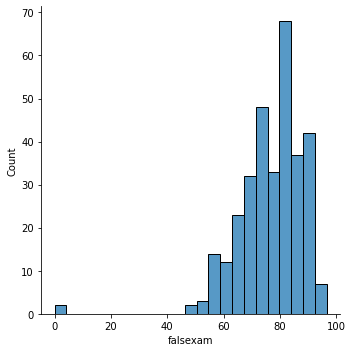

In [15]:
sns.displot(data, x="falsexam")

In [16]:
# nueva columna
datos = (data
 .assign(class_format = np.select(
     [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face" #nueva variable
 ))) 

In [17]:
pd.get_dummies(datos, columns=["class_format"]).head()

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended,class_format_face_to_face,class_format_online
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0,1,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0,1,0
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,1,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,1,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,0,0,1


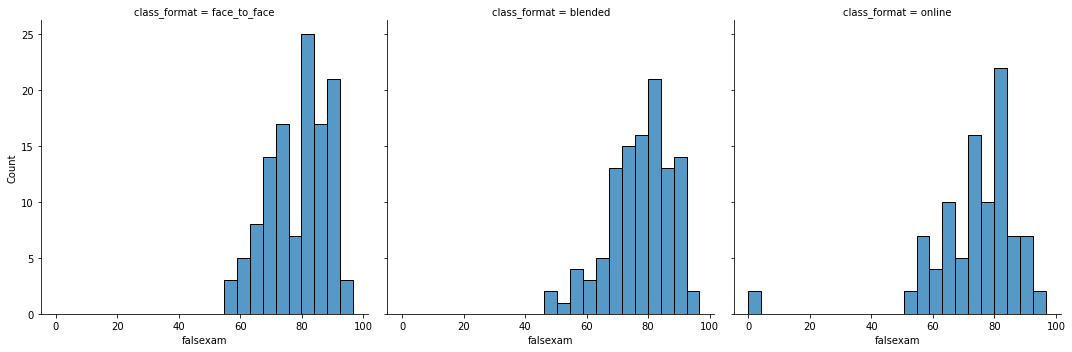

In [19]:
sns.displot(datos, x="falsexam", col="class_format")

Text(19.309791666666662, 0.5, 'Estudiantes')

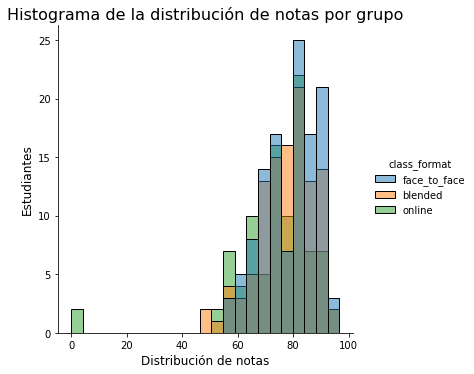

In [23]:
sns.displot(datos, x="falsexam", hue="class_format")  
plt.title("Histograma de la distribución de notas por grupo", fontsize=16)
plt.xlabel("Distribución de notas", fontsize=12)
plt.ylabel("Estudiantes", fontsize=12)

#### Interpretación:
Se puede evidenciar que existen diferencias en los 3 histogramas traslapados. El grupo online (virtual) posee los valores más bajos en la distribución de notas. En ese sentido, dichos valores oscilan entre 0 y 5, porlo que se podría afirmar que los valores de este grupo son en general los valores más bajos. Por su lado, el formato blended (mixto) presenta valores medios y cuyos estudiante presentan notas entre 45 y 50. El formato face to face (presencial), por otra parte, presenta los valores más altos, que van de 45 a más. En suma, se podría afirmar que los alumnos que asisten a clases presenciales son más proclives a sacar notas más altas, los alumnos que realizan sus clase de forma híbrida tienden a sacar notas medias y los alumnos que tienen clases virtuales suelen sacar las notas más bajas.